In [2]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import batch_iter, load
from model import *

base = Path('../aclImdb')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
testdf = pd.read_csv('test.csv')
traindf = pd.read_csv('train.csv')

In [3]:
from utils import *

# Attention Dropout vs Dropout
Trained on 15K dataset we see my model does not overfit while standard dropout methods lead to overfitting.

Total Time: 207.9679 
Train Time: 35.6002
Max (Validation, Train): (0.86, 0.86)


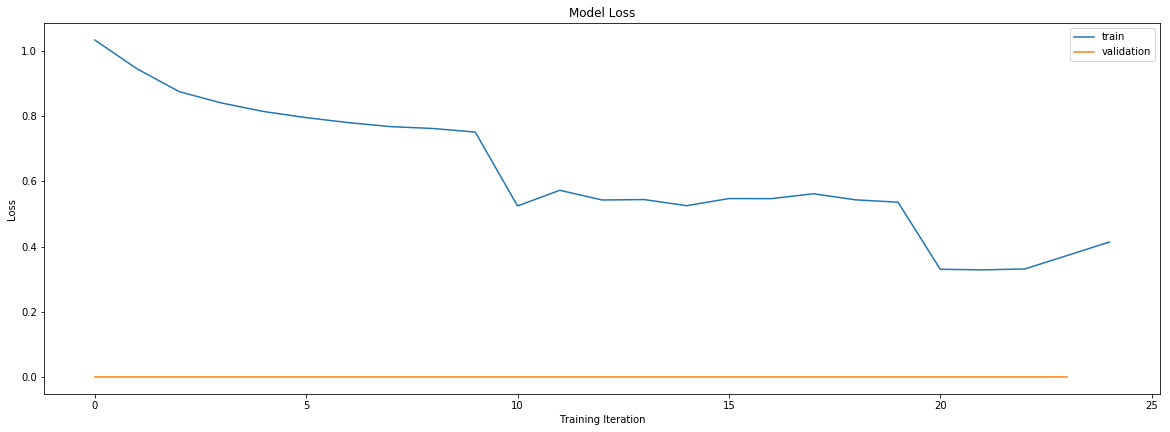

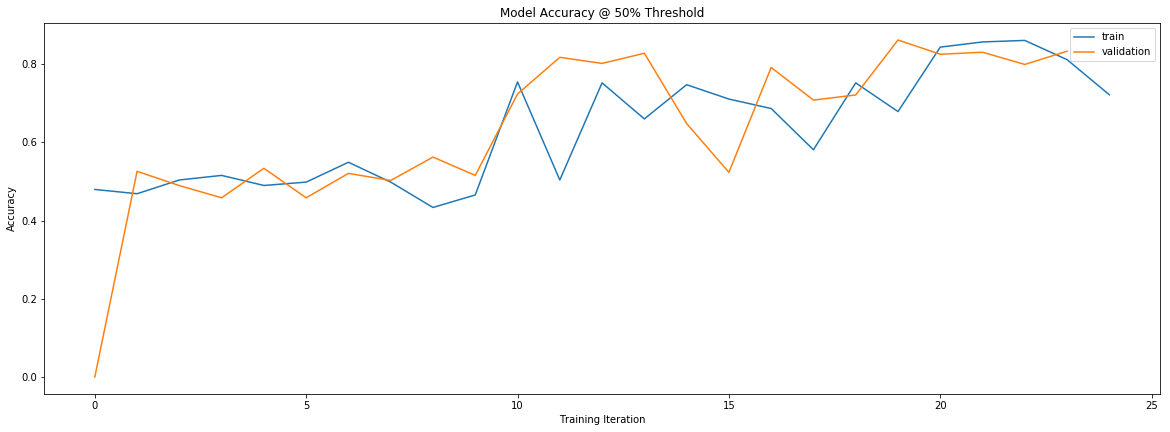

In [5]:
model_path = 'e=2_itr=54_cancel_6june-909-attndropout'
model1, optim, lang, m1 = load(model_path, cpu=True)
plot_metrics(m1)

Total Time: 199.0508 
Train Time: 28.9181
Max (Validation, Train): (0.65, 0.90)


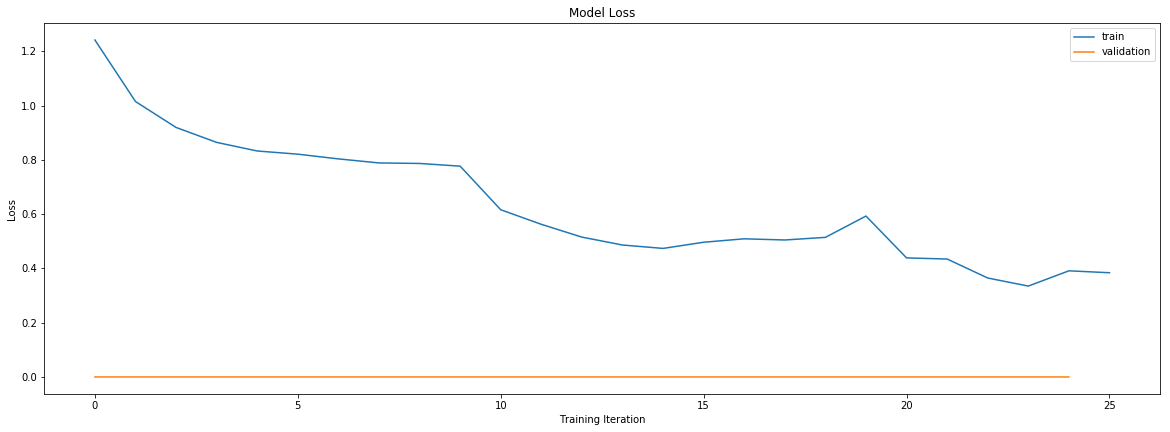

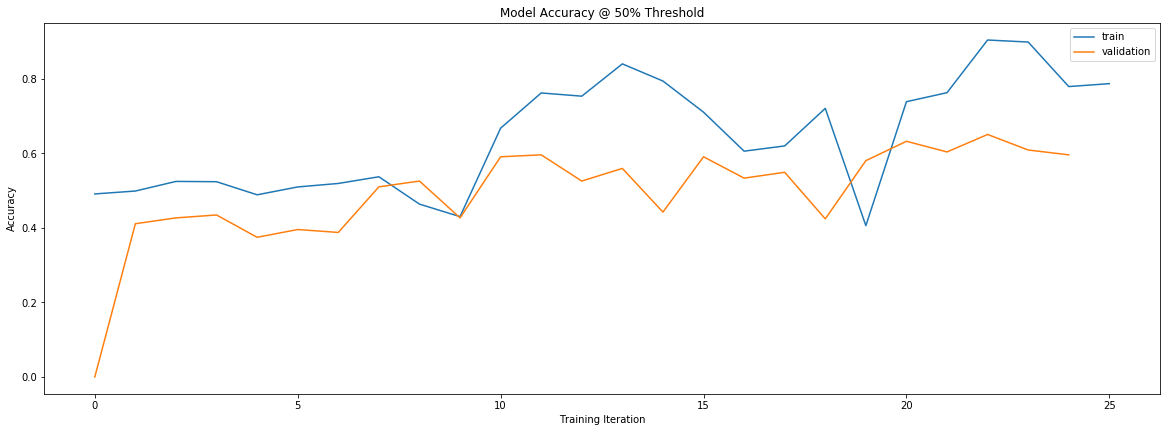

In [6]:
model_path = 'e=2_itr=62_cancel_6june-903-dropout'
model2, optim, lang, m2 = load(model_path, cpu=True)
plot_metrics(m2)

--------6june-909-attndropout----------
Max (Validation, Train): (0.86, 0.86)
--------6june-903-dropout----------
Max (Validation, Train): (0.65, 0.90)


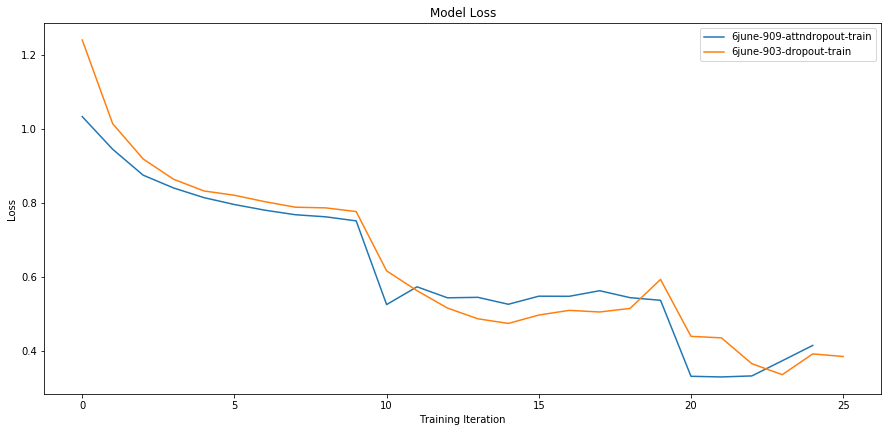

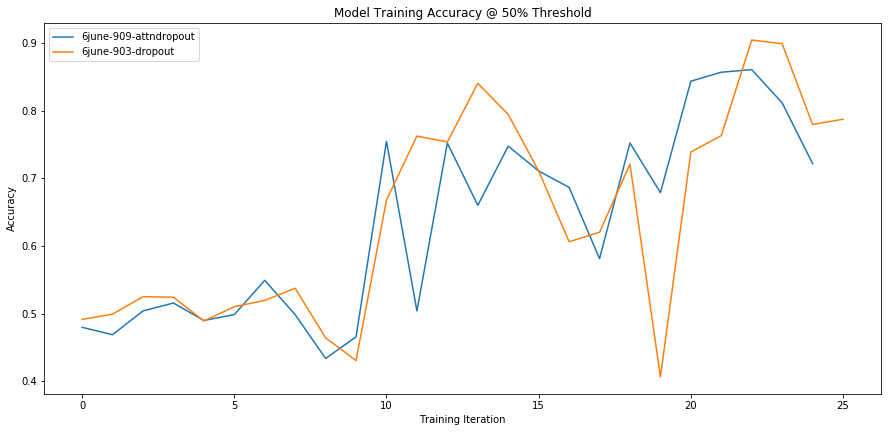

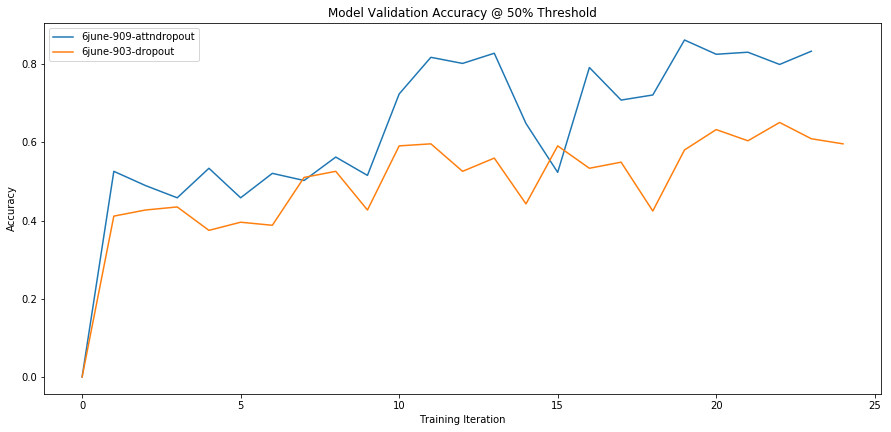

In [38]:
compare_metrics([m1, m2], first_n=-1)

In [7]:
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(m1['args'])
print('------------------------------------------------------------')
pp.pprint(m2['args'])

{   '--batch-size': '128',
    '--clip-grad': '5.0',
    '--dropout': '0.3',
    '--dset-size': '15000',
    '--embed-size': '300',
    '--help': False,
    '--hidden-size': '1024',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '0.0002',
    '--max-epoch': '30',
    '--max-sent-len': '800',
    '--n-heads': '2',
    '--n-layers': '2',
    '--n-valid': '200',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': '6june-909-attndropout',
    '--seed': '21',
    '--valid-niter': '10',
    '--validate-every': '10'}
------------------------------------------------------------
{   '--batch-size': '128',
    '--clip-grad': '5.0',
    '--dropout': '0.3',
    '--dset-size': '15000',
    '--embed-size': '300',
    '--help': False,
    '--hidden-size': '1024',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '0.0002',
    '--max-epoch': '30',
    '--max-sent-len': '800',
   

# Similar Comparison on 5K Dataset

In [34]:
model_path = 'e=8_itr=21_cancel_6june-949-dropout-5K'
model1, optim, lang, m1 = load(model_path, cpu=True)

In [32]:
model_path = 'e=8_itr=23_cancel_6june-909-attndropout-5K'
model1, optim, lang, m2 = load(model_path, cpu=True)

--------6june-949-dropout-5K----------
Max (Validation, Train): (0.84, 0.90)
--------6june-909-attndropout-5K----------
Max (Validation, Train): (0.85, 0.89)


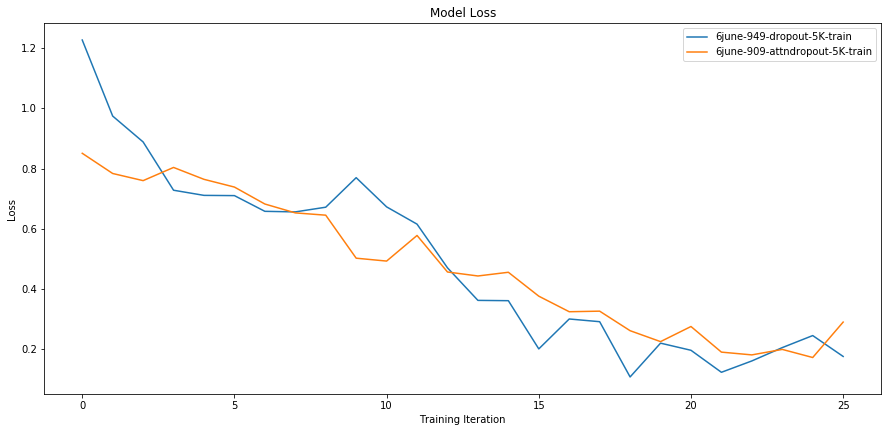

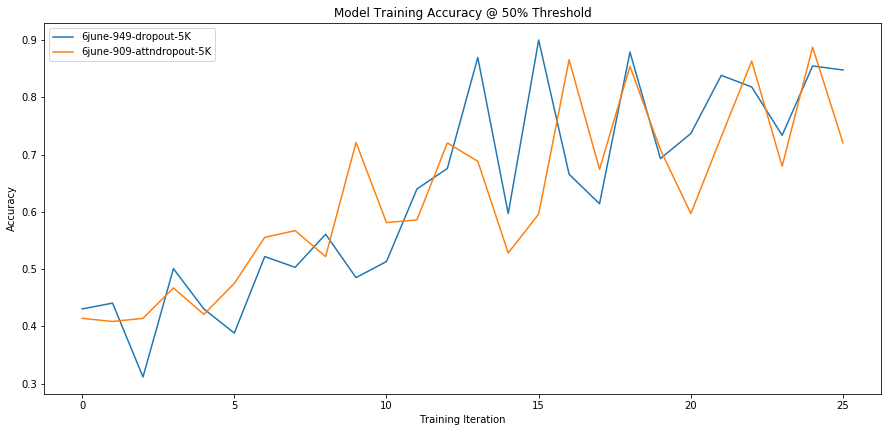

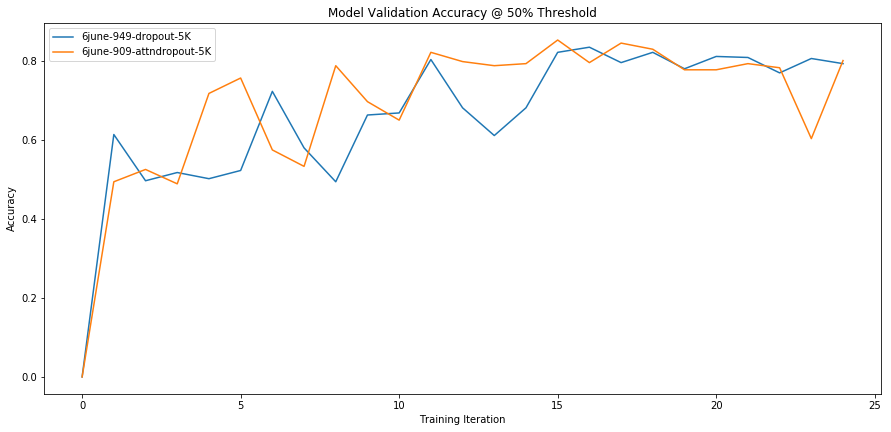

In [35]:
compare_metrics([m1, m2], first_n=-1)